<a href="https://colab.research.google.com/github/semishen/ML100Days/blob/master/Day_042_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

### Q1: 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
### A1: iris 資料集內部結構相對單純，更改 meta params (criterion='entropy', max_depth=3) 有改變模型的深度與葉數，但並沒有改變正確率。

<br/>

### Q2: 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較
### A2: 以 Boston 資料集為例，Linear regression 為 baseline 與 DecisionTreeRegressor 比較，Linear regression F2 score: 0.708 較優於 DecisionTreeRegressor F2 score: 0.638。

In [ ]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # tree
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test) # baseline: 0.9736842105263158

0.9736842105263158

In [ ]:
print('feature importances: ', {name:value for (name, value) in zip(iris.feature_names, clf.feature_importances_)})

feature importances:  {'sepal length (cm)': 0.015606201878709982, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.6226416262865381, 'petal width (cm)': 0.361752171834752}


In [ ]:
print('depth: ', clf.get_depth())
print('n_leaves: ', clf.get_n_leaves())
print('params: ', clf.get_params())

depth:  4
n_leaves:  8
params:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
# modify meta params
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2.fit(x_train, y_train)
#y_pred = clf2.predict(x_test)

print('score: ', clf2.score(x_test, y_test))
print('depth: ', clf2.get_depth())
print('n_leaves: ', clf2.get_n_leaves())
print('feature importances: ', {name:value for (name, value) in zip(iris.feature_names, clf2.feature_importances_)})


score:  0.9736842105263158
depth:  3
n_leaves:  5
feature importances:  {'sepal length (cm)': 0.0, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.6712479060534087, 'petal width (cm)': 0.32875209394659133}


In [ ]:
### boston

boston = datasets.load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df_boston.shape)
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=8)

### baseline: linear regression
linear = LinearRegression()
linear.fit(x_train, y_train)
print('params: ', linear.coef_)
print('R2: ', linear.score(x_test, y_test))

(506, 14)
params:  [-1.11254928e-01  5.18680433e-02  1.43321667e-02  2.51154050e+00
 -1.49265180e+01  3.93483238e+00 -4.64570429e-03 -1.51844278e+00
  2.87110592e-01 -1.12144664e-02 -9.34072213e-01  8.32690858e-03
 -5.59947918e-01]
F2 score:  0.7079627967134545


In [ ]:
### target is float -> use DecisionTreeRegressor
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

print('R2: ', clf3.score(x_test, y_test))
print('depth: ', clf3.get_depth())
print('n_leaves: ', clf3.get_n_leaves())
print('feature importances: ', {name:value for (name, value) in zip(boston.feature_names, clf3.feature_importances_)})

F2 score:  0.6381615105867223
depth:  20
n_leaves:  385
feature importances:  {'CRIM': 0.05035273199888729, 'ZN': 0.000302651010642542, 'INDUS': 0.0022961163485930264, 'CHAS': 5.5566687592157774e-05, 'NOX': 0.02870238577875016, 'RM': 0.5933816503809305, 'AGE': 0.01351685514528803, 'DIS': 0.08054996642529592, 'RAD': 0.0014901103877441118, 'TAX': 0.007605263150478112, 'PTRATIO': 0.012691106040023865, 'B': 0.011179983132907207, 'LSTAT': 0.19787561351286695}


In [ ]:
clf4 = DecisionTreeRegressor(max_depth=4, min_samples_split=5)
clf4.fit(x_train, y_train)

print('R2: ', clf4.score(x_test, y_test))
print('depth: ', clf4.get_depth())
print('n_leaves: ', clf4.get_n_leaves())
print('feature importances: ', {name:value for (name, value) in zip(boston.feature_names, clf4.feature_importances_)})

F2 score:  0.6818204747520006
depth:  4
n_leaves:  15
feature importances:  {'CRIM': 0.042398166347101564, 'ZN': 0.0, 'INDUS': 0.0, 'CHAS': 0.0, 'NOX': 0.028017752588531186, 'RM': 0.6435335884774532, 'AGE': 0.0, 'DIS': 0.0788426307146012, 'RAD': 0.0, 'TAX': 0.0, 'PTRATIO': 0.007935009271750696, 'B': 0.002317026508720124, 'LSTAT': 0.19695582609184195}


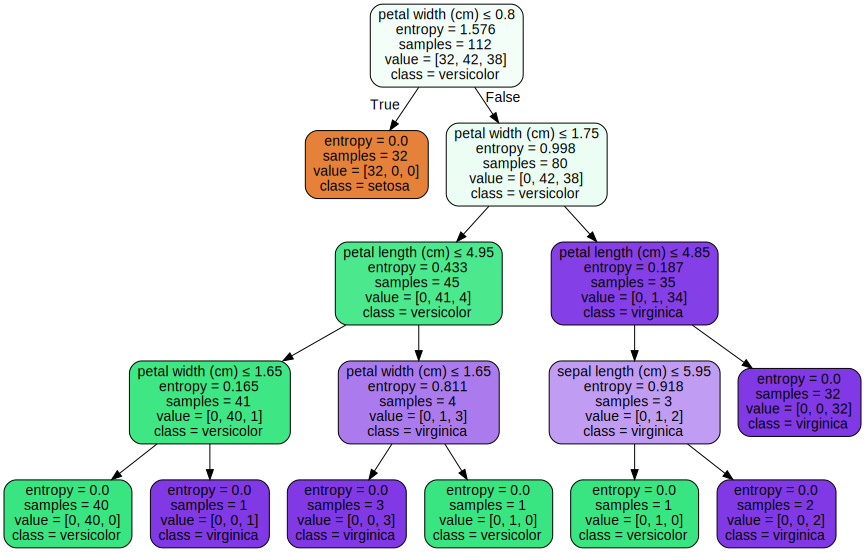

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 